In [1]:
# dummy variables & predictions/CIs 

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random as random
from scipy import stats
import patsy

from IPython.display import Image


In [2]:
#Example: automobile data
#https://www.kaggle.com/toramky/automobile-dataset

carsdata=pd.read_csv('../data/Automobile_data.csv')
carsdata.sample(5)

symboling normalized-losses        make fuel-type aspiration  \
182          2               122  volkswagen    diesel        std   
196         -2               103       volvo       gas        std   
122          1               154    plymouth       gas        std   
139          2                83      subaru       gas        std   
145          0               102      subaru       gas      turbo   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
182          two      sedan          fwd           front        97.3  ...   
196         four      sedan          rwd           front       104.3  ...   
122         four      sedan          fwd           front        93.7  ...   
139          two  hatchback          fwd           front        93.7  ...   
145         four      sedan          4wd           front        97.0  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
182           97          idi  3.01     3.4              23.0         52   
196          141         mpfi  3.78    3.15               9.5        114   
122           98         2bbl  2.97    3.23               9.4         68   
139          108         2bbl  3.62    2.64               8.7         73   
145          108         mpfi  3.62    2.64               7.7        111   

     peak-rpm city-mpg highway-mpg  price  
182      4800       37          46   7775  
196      5400       24          28  15985  
122      5500       31          38   7609  
139      4400       26          31   7053  
145      4800       24          29  11259  

[5 rows x 26 columns]

In [3]:
# categorical variables: fuel-type
carsdata['city-mpg'].replace('?', np.nan)
carsdata['fuel-type'].replace('?', np.nan)
cars=carsdata.dropna().copy()

#check the summary of 'fuel-type': two levels: gas and diesel
print(cars['fuel-type'].value_counts())


fuel-type
gas       185
diesel     20
Name: count, dtype: int64


In [4]:
# regression city-mpg~fuel-type, names wouldn't be recogonized in smf.ols

cars['citympg']=cars['city-mpg']
cars['fueltype']=cars['fuel-type']
reg = smf.ols('citympg ~ fueltype', data=cars).fit()
reg.summary()

# in the summary it only shows 1 level: gas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     14.23
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           0.000212
Time:                        14:05:54   Log-Likelihood:                -668.48
No. Observations:                 205   AIC:                             1341.
Df Residuals:                     203   BIC:                             1348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.3000      1.418     21.374      0.000      27.505      33.095
fueltype[T.gas]    -5.6297      1.492     -3.773      0.000      -8.572      -2.687
==============================================================================
Omnibus:                       17.025   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.937
Skew:                           0.668   Prob(JB):                     7.73e-05
Kurtosis:                       3.658   Cond. No.                         6.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#similarly, drivewheels has 3 levels
cars['drivewheels']=cars['drive-wheels']
print(cars['drivewheels'].value_counts())

drivewheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


In [6]:
reg1 = smf.ols('citympg ~ drivewheels', data=cars).fit()
reg1.summary()

#two levels: fwd, rwd show up, 4wd as the baseline level doesn't show

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     48.38
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           6.81e-18
Time:                        14:05:54   Log-Likelihood:                -635.31
No. Observations:                 205   AIC:                             1277.
Df Residuals:                     202   BIC:                             1287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.1111      1.802     12.825      0.000      19.558      26.664
drivewheels[T.fwd]     5.2056      1.868      2.786      0.006       1.522       8.890
drivewheels[T.rwd]    -2.5322      1.906     -1.329      0.185      -6.290       1.225
==============================================================================
Omnibus:                       15.581   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.666
Skew:                           0.537   Prob(JB):                     5.36e-05
Kurtosis:                       4.072   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
sm.stats.anova_lm(reg1, typ=2) #in anova, it's analysis as a whole
# reduce: null model
# full: y~drivewheels_fwd+ drivewheels_rwd
# notice: df of drivewheels is 2, since there are two parameters to estimate in drivewheels

sum_sq     df          F        PR(>F)
drivewheels  2827.740080    2.0  48.379345  6.809467e-18
Residual     5903.381871  202.0        NaN           NaN

In [8]:
# same for MLR with categorical variables
cars['enginesize']=cars['engine-size']
reg2 = smf.ols('citympg ~ enginesize+ drivewheels + fueltype', data=cars).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                citympg   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     74.59
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.36e-38
Time:                        14:05:54   Log-Likelihood:                -581.84
No. Observations:                 205   AIC:                             1174.
Df Residuals:                     200   BIC:                             1190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.9139      1.954     19.911      0.000      35.060      42.768
drivewheels[T.fwd]     4.5714      1.449      3.156      0.002       1.715       7.428
drivewheels[T.rwd]     0.2171      1.537      0.141      0.888      -2.813       3.247
fueltype[T.gas]       -7.0471      0.994     -7.090      0.000      -9.007      -5.087
enginesize            -0.0795      0.009     -9.319      0.000      -0.096      -0.063
==============================================================================
Omnibus:                       33.046   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.717
Skew:                           0.689   Prob(JB):                     4.02e-19
Kurtosis:                       5.832   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
sm.stats.anova_lm(reg2, typ=2) 

sum_sq     df          F        PR(>F)
drivewheels   699.332669    2.0  19.958355  1.250114e-08
fueltype      880.634747    1.0  50.265123  2.260697e-11
enginesize   1521.368276    1.0  86.837095  2.213074e-17
Residual     3503.959410  200.0        NaN           NaN

In [10]:
sm.stats.anova_lm(reg2, typ=2) 

sum_sq     df          F        PR(>F)
drivewheels   699.332669    2.0  19.958355  1.250114e-08
fueltype      880.634747    1.0  50.265123  2.260697e-11
enginesize   1521.368276    1.0  86.837095  2.213074e-17
Residual     3503.959410  200.0        NaN           NaN

In [11]:
# when the variable is categorical, but the levels are incidated as numbers in the data
# or if you want to analyze an ordinal variable as categorical
# we can "force" it to be categorical using "C()" in smf.ols

credit = pd.read_csv("../data/Credit.csv")
credit.sample(5)




Unnamed: 0  Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0             1  14.891   3606     283      2   34         11    Male      No   
334         335  24.230   4756     351      2   64         15  Female      No   
322         323  27.229   3484     282      6   51         11    Male      No   
371         372  39.116   2150     173      4   75         15    Male      No   
104         105  15.846   4768     365      4   53         12  Female      No   

    Married  Ethnicity  Balance  
0       Yes  Caucasian      333  
334     Yes  Caucasian      594  
322      No  Caucasian      265  
371      No  Caucasian        0  
104      No  Caucasian      745

In [12]:
# example: number of cards
# without changing anything, it will be analyzed as numeric

reg3= smf.ols('Balance~Cards', data=credit).fit()
reg3.summary()

#not a perfect example since there are too many levels, but you get the idea
# then we see compared to having just one card, if there's significant changes of having more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.997
Date:                Thu, 18 Sep 2025   Prob (F-statistic):             0.0842
Time:                        14:05:54   Log-Likelihood:                -3017.9
No. Observations:                 400   AIC:                             6040.
Df Residuals:                     398   BIC:                             6048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.2861     54.569      7.958      0.000     327.006     541.566
Cards         28.9869     16.743      1.731      0.084      -3.929      61.903
==============================================================================
Omnibus:                       28.964   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.603
Skew:                           0.566   Prob(JB):                     1.67e-06
Kurtosis:                       2.437   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#change it to categorical
reg3= smf.ols('Balance~C(Cards)', data=credit).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.144
Date:                Thu, 18 Sep 2025   Prob (F-statistic):              0.332
Time:                        14:05:54   Log-Likelihood:                -3014.7
No. Observations:                 400   AIC:                             6047.
Df Residuals:                     391   BIC:                             6083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       531.1373     64.286      8.262      0.000     404.748     657.527
C(Cards)[T.2]   -58.1720     77.236     -0.753      0.452    -210.023      93.679
C(Cards)[T.3]   -39.0742     77.663     -0.503      0.615    -191.763     113.615
C(Cards)[T.4]    45.2794     84.024      0.539      0.590    -119.916     210.475
C(Cards)[T.5]    -8.1373    101.645     -0.080      0.936    -207.977     191.702
C(Cards)[T.6]   149.6809    152.622      0.981      0.327    -150.381     449.743
C(Cards)[T.7]   497.6127    238.379      2.087      0.037      28.947     966.278
C(Cards)[T.8]   106.8627    463.574      0.231      0.818    -804.547    1018.272
C(Cards)[T.9]  -149.1373    463.574     -0.322      0.748   -1060.547     762.272
==============================================================================
Omnibus:                       28.038   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.387
Skew:                           0.568   Prob(JB):                     1.86e-06
Kurtosis:                       2.459   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## USF Go Dons Fitness Example

[Go Dons Get Fit](https://myusf.usfca.edu/human-resources/gousf/go-dons-get-fit) is a wellness challenge at USF that runs from Oct 1-31 every year. 

Students and faculty from different college sign up and record their physical activity/workouts in a competition to see who is more active. If you want to participate you can register here: https://godonsgetfit.org/

Dr. Sarah Camhi in the Dept. of Kinesiology has used this challenge to record wearable device data from students participating in the event. Over the course of a baseline 2 week period prior to the challenge, the 4 weeks during the challenge and 2 weeks after the challenge, 50 students were observed using accelerometers:


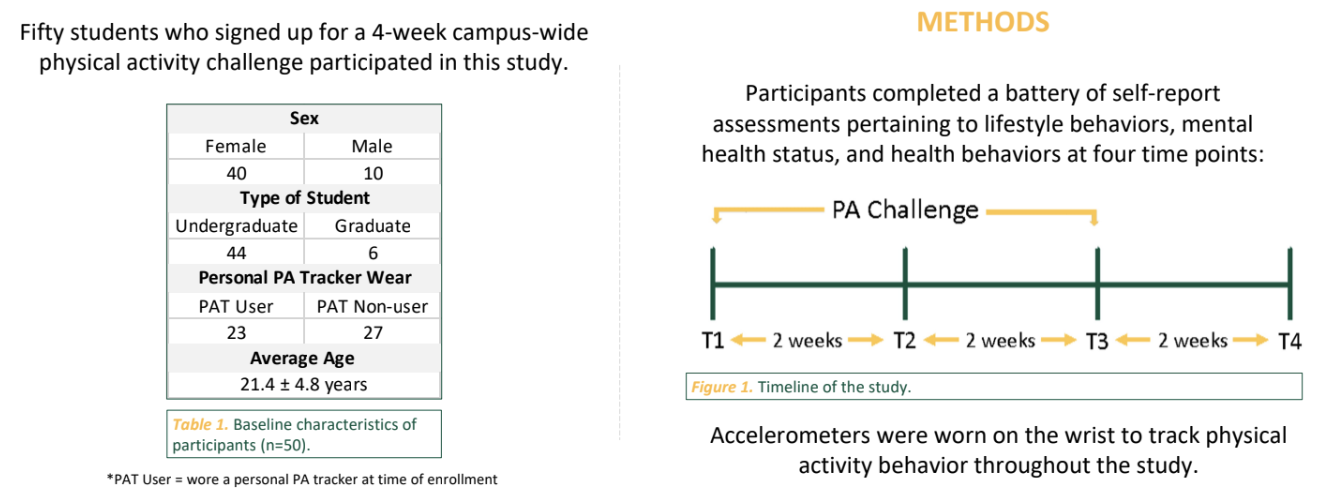

In [14]:
Image("../data/godons.png")

Suppose we wanted to model the total steps taken by a student during the first two weeks of the challenge, using the students' age, sex, race, and baseline step count as predictors.

In [15]:
random.seed(1234321)
usf_fitness=pd.read_csv('../data/godons_fitness.csv')
usf_fitness

Unnamed: 0        Age     Sex  \
0            1  18.701370  Female   
1            2  19.323288  Female   
2            3  18.942466  Female   
3            4  20.334247  Female   
4            5  18.706849  Female   
5            6  18.665753    Male   
6            7  20.846575  Female   
7            8  19.087671  Female   
8            9  20.920548  Female   
9           10  43.632877  Female   
10          11  19.736986  Female   
11          12  29.235616    Male   
12          13  18.895890    Male   
13          14  18.279452  Female   
14          15  19.449315  Female   
15          16  21.284932  Female   
16          17  23.271233  Female   
17          18  22.210959    Male   
18          19  19.432877  Female   
19          20  20.663014  Female   
20          21  24.191781    Male   
21          22  18.315068  Female   
22          23  21.463014    Male   
23          24  21.471233  Female   
24          25  19.986301  Female   
25          26  18.172603  Female   
26          27  21.194521  Female   
27          28  20.482192  Female   
28          29  20.161644    Male   
29          30  21.301370  Female   
30          31  21.594521  Female   
31          32  21.287671  Female   
32          33  19.704110  Female   
33          34  19.871233  Female   
34          35  20.797260  Female   
35          36  27.298630  Female   
36          37  21.775342  Female   
37          38  21.326027  Female   
38          39  18.356164  Female   
39          40  19.912329  Female   
40          41  35.621918    Male   
41          42  20.821918  Female   
42          43  18.646575  Female   
43          44  26.728767    Male   
44          45  21.186301  Female   
45          46  21.273973  Female   
46          47  21.520548    Male   
47          48  22.493151  Female   
48          49  34.156164  Female   
49          50  20.958904  Female   

                                               Race  sleep_baseline  \
0                                             Asian             NaN   
1                                             White             NaN   
2                                             Asian             NaN   
3                                             Asian             NaN   
4                                             White             NaN   
5                                             Asian             NaN   
6                                             White             NaN   
7                                             White             NaN   
8         Native Hawaiian or Other Pacific Islander             NaN   
9                                             Asian      421.428571   
10                                            Asian      485.857143   
11                                            White      509.428571   
12                                            Asian      533.333333   
13                                            Asian      506.000000   
14                                            Asian      546.000000   
15                                            Other      501.285714   
16                                            Other      637.200000   
17                                            Other      588.000000   
18                                            White      510.571429   
19                                            White      489.000000   
20                                            White      531.571429   
21  Asian,Native Hawaiian or Other Pacific Islander      610.714286   
22                                            White      443.714286   
23                                            Asian      510.833333   
24                                            White      528.142857   
25                                            Asian      455.833333   
26                                            Asian      524.166667   
27                                            Asian      573.428571   
28                                            Asian      

In [16]:
#totalsteps during weeks 1-2 ~ Age + Sex + Race + totalsteps_baseline

regfit = smf.ols('total_steps_week12 ~ Age + Sex + Race + total_steps_baseline', data=usf_fitness).fit()
regfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_steps_week12   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     11.42
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.80e-07
Time:                        14:05:54   Log-Likelihood:                -343.72
No. Observations:                  39   AIC:                             709.4
Df Residuals:                      28   BIC:                             727.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                9577.3624   3517.255      2.723      0.011    2372.593    1.68e+04
Sex[T.Male]                                                81.9609    795.862      0.103      0.919   -1548.289    1712.211
Race[T.Asian]                                           -3860.7439   2024.520     -1.907      0.067   -8007.786     286.298
Race[T.Asian,Native Hawaiian or Other Pacific Islander] -4275.2697   2436.064     -1.755      0.090   -9265.320     714.780
Race[T.Asian,White]                                     -3924.3144   2758.837     -1.422      0.166   -9575.535    1726.907
Race[T.Black or Africa American]                        -5203.9339   2716.722     -1.916      0.066   -1.08e+04     361.019
Race[T.Native Hawaiian or Other Pacific Islander]        -634.8115   2787.678     -0.228      0.822   -6345.111    5075.488
Race[T.Other]                                           -4756.3476   2196.526     -2.165      0.039   -9255.728    -256.967
Race[T.White]                                           -2624.2236   2015.898     -1.302      0.204   -6753.604    1505.157
Age                                                      -125.1858     63.700     -1.965      0.059    -255.668       5.297
total_steps_baseline                                        0.8117      0.101      8.009      0.000       0.604       1.019
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.610
Skew:                           0.188   Prob(JB):                        0.737
Kurtosis:                       2.516   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's make a 95% CI for the mean response of a generic subject with the same stats as the student in the 11th row:

In [17]:
xh = usf_fitness.loc[[10],['Age','Sex','Race','total_steps_baseline']]
xh

#you can compare with 
#xh = usf_fitness.loc[[10],['Age','Sex','Race','total_steps_baseline']]
#to see why the brackets around [10] are needed

Age     Sex   Race  total_steps_baseline
10  19.736986  Female  Asian               25447.0

In [18]:
xh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 10 to 10
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1 non-null      float64
 1   Sex                   1 non-null      object 
 2   Race                  1 non-null      object 
 3   total_steps_baseline  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 40.0+ bytes


In [19]:
pred = regfit.get_prediction(xh)
pred_summary = pred.summary_frame(alpha=0.05)

print(pred_summary)

           mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  23900.059296  686.978369   22492.847899   25307.270694  19723.233212   

   obs_ci_upper  
0  28076.885381  


In [20]:
#this is the fitted val & 95%CI Part
print(pred_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']])


           mean  mean_ci_lower  mean_ci_upper
0  23900.059296   22492.847899   25307.270694


## How is Python calculating this??

Let's sanity check by doing it by hand:

In [21]:
#get the design matrix
X = np.asarray(regfit.model.exog)

# and the column names 
X_names = np.asarray(regfit.model.exog_names)

#y vector:
y = np.asarray(regfit.model.endog).ravel()  

In [22]:
X

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.36328767e+01, 1.72965714e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.97369863e+01, 2.54470000e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.92356164e+01, 2.73435714e+04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.88958904e+01, 2.40495000e+04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.82794521e+01, 2.18370000e+

In [37]:
## do the fitting by hand:
XtX = X.T @ X                             
XtX_inv = np.linalg.inv(XtX)    # (X^TX)^{-1}         
Xty = X.T @ y                             
beta_hat = XtX_inv @ Xty   # (X^TX)^{-1}X^TY               

y_hat_all = X @ beta_hat                  
resid = y - y_hat_all                     
df_resid = X.shape[0] - X.shape[1] #n-p
s2 = (resid @ resid) / df_resid   #mse    #e^Te/(n-p)    
var_beta = s2 * XtX_inv               

In [44]:
#make design matrix for this obs (i.e. the row that would show up in the X matrix)
design_info = regfit.model.data.design_info
xh_design = patsy.build_design_matrices([design_info], xh)[0]  
xh_design = np.asarray(xh_design)
xh_design.shape


#grab var betahat
var_beta   = regfit.cov_params().values

In [45]:
xh_design

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.97369863e+01, 2.54470000e+04]])

In [46]:
xh_design.shape
#hmm ok... but...

(1, 11)

In [47]:
#we normally think of xh as a column vector so lets just make it one:
xh_design = xh_design.T

In [48]:
y_hat   = xh_design.T @ beta_hat                   
se_yhat = np.sqrt(xh_design.T @ var_beta @ xh_design)[0]  

In [49]:
se_yhat

array([686.97836914])

In [29]:
#get t-crit, use df = n-p = regfit.df_resid
tcrit = stats.t.ppf(0.975, df=regfit.df_resid)

# calc lower/upper bounds
ci_lower = y_hat - tcrit * se_yhat
ci_upper = y_hat + tcrit * se_yhat

print([ci_lower,ci_upper])

[array([22492.84789854]), array([25307.27069375])]


### Exercise. 

Can you make a 95% CI for the mean response for a generic student who is:
 - 22y
 - Male
 - Native Hawaiian or Other Pacific Islander
 - baseline steps of 15000
   
   ?

1. Make the CI using built in functions like get_prediction().
2. Make the CI by hand using matrix multiplication.